<a href="https://colab.research.google.com/github/afirdousi/pytorch-basics/blob/main/006_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using PyTorch version = { torch.__version__ }")
print(f"Using device = { device }")  # We will be doing device agnostic code in this tutorial

Using PyTorch version = 2.0.1+cu118
Using device = cuda


In [49]:
# Classification

# Types & Examples:
# Binary Class Classification: Spam vs Not Spam | Dog or Cat?
# Multiclass Classification: Sushi or Pizza or Biryani? | Dog or Cat or Tiger or Cow or whatever ...
# Multi Label Classification: One record has multiple labels like classifying a news into multiple categories or categorizing a wikipedia article to attach relevant categories to the page

In [50]:
# Classification Inputs and Outputs

# Example:

# Input (Picture) ---> ML Algo ---> Output (Label)

# Input
  # Genreally computer vision problems, convert pictures into 224x224
  # Each pictures has W = 224, H = 224 and C = 3 ... C here is color channels R,G,B
  # We create a numerical encoding of that like
  # [
  #     [0.31] [0.62], [0.44],
  #     [0.29] [0.95], [0.0.16],
  #     ...
  # ]

# ML Algo
  # Often exists for the type of problem you are solving
  # If not, you can create a new one

# Output
  # These are preidtion probabilities
  # For eaxmple, if we are predicting if the picture is sushi, burger or pizze,
  # For each input, we might return probablity of this image being either one

  # something like [0.97, 0.00, 0.03] i.e 97% chance its a sushi


In [51]:
# Input and Output shapes

# For example, image input is represented something like:

# [ batch_size, color_channels, width, height ] # the sequence of this can change, doesn't matter

# Example:
# Shape = [ None, 3, 224, 224 ]
# or
# Shape = [ 32, 3, 224, 224 ] # 32 is a common batch size
# Check https://twitter.com/ylecun/status/989610208497360896?s=20
# Batch size is saying train on 32 images at once


# Output for multiclass like sushi, burger or biryani
# Shape = [3]

In [52]:
# Architecture of a Classification Model

# Define sequential input layers: number of in_features and number of out_features

# for example:

# in_features define the number of neurons per layer
fun_model = nn.Sequential(
    nn.Linear(in_features = 3, out_features= 100), # input layer
    nn.Linear(in_features = 100, out_features= 100), # hidden layer
    nn.ReLU(), # hidden activation layer # More here: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity
    nn.Linear(in_features = 100, out_features= 3) # output layer
)

# There is also output layer activation like Sigmoid (torch.sigmoid) for binary classification or Softmax (torch.softmax) for multiclass classification
# You will also define Loss function: Binary Crossentropy (torch.nn.BCELoss) for binary classification AND Cross Entropy (torch.nn.CrossEntropyLoss) for multiclass classification
# You will also define Optimizer function: SGD, Adam (see torch.optim) --> applies for both binary and multiclass classification

In [53]:
fun_model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0250,  0.5599, -0.5118],
                      [-0.0984, -0.0404,  0.2867],
                      [ 0.0737, -0.4642,  0.2745],
                      [-0.0840,  0.0911, -0.3414],
                      [-0.2114, -0.0736, -0.4360],
                      [-0.2576, -0.4642, -0.3403],
                      [ 0.4753,  0.0063,  0.5302],
                      [ 0.2063,  0.1219, -0.0722],
                      [-0.3294,  0.2909, -0.0668],
                      [-0.1930,  0.5641,  0.2047],
                      [ 0.5401, -0.0959,  0.3094],
                      [-0.5157,  0.5158, -0.2697],
                      [-0.5334, -0.5117,  0.4999],
                      [ 0.4525, -0.5531,  0.3312],
                      [ 0.4001,  0.0053,  0.1729],
                      [-0.2650,  0.4046,  0.1065],
                      [ 0.2396,  0.1848, -0.1869],
                      [-0.2084,  0.5396, -0.3765],
                      [-0.3859, -0.3905, -0.2635],
     

In [54]:
import sklearn

In [55]:
from sklearn.datasets import make_circles
# Check https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html
# and other datasets available in sklearn https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [56]:
len(X), len(y)

(1000, 1000)

In [57]:
print(f"\nFirst 10 samples of X = \n { X[:10] }" )
print(f"\nFirst 10 samples of y = \n { y[:10] }" )


First 10 samples of X = 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]

First 10 samples of y = 
 [1 1 1 1 0 1 1 1 1 0]


In [58]:
# From above sample, we can say there are 2 input features of X and its a binary classification since label is either 0 or 1

In [59]:
# Make DataFrame or circle data

import pandas as pd
circles = pd.DataFrame({ "X1": X[:, 0],
                        "X2": X[:,1],
                         "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


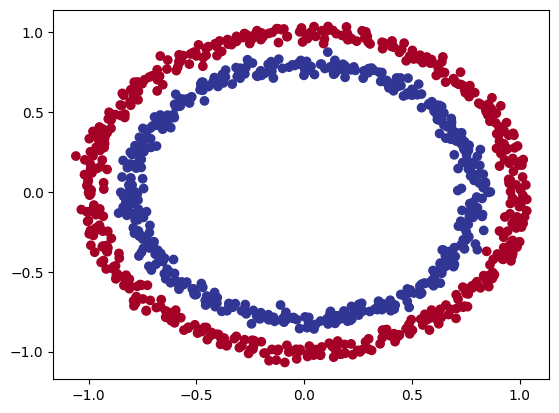

In [60]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap = plt.cm.RdYlBu) # cmap = color map

In [61]:
X.shape, y.shape

((1000, 2), (1000,))

In [62]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


In [63]:
# Turn data into tensors and create train and test splits (this step remains as is)
type(X), X.dtype # note that in numpy default types is float64

(numpy.ndarray, dtype('float64'))

In [64]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # we are converting into pytorch default float which is float32 (float64 in pytorhc may cause error)
y = torch.from_numpy(y).type(torch.float)

X, y

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
         1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
         1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
         0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0.,
         1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0.,
         0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
         1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
         1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,


In [65]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [66]:
type(y), y.dtype

(torch.Tensor, torch.float32)

In [67]:
# Spliting data into training and test sets (using Scikit learn)
from sklearn.model_selection import train_test_split

# Note: train_test_split function randomly splits data
X_train, X_test, y_train, y_test = train_test_split(X, y) # By default train = 75% data test = 25%

In [68]:
len(X_train), len(X_test), len(y_train), len(y_test)

(750, 250, 750, 250)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [70]:
# Building a classification model for our blue and red dots

# Step 1. Setup device agnostic code to to create model
# We have already done Step.1 with ---> device = "cuda" if torch.cuda.is_available() else "cpu"

# Step 2. Construct a model by subclassing nn.Module
# Step 3. Create layers (2 for example) that are capable of handling the shape of our data
# Step 4. Define forward method
# Step 5. Instantiate model


# Step 2. Construct a model by subclassing nn.Module
class CircleModuleV0( nn.Module ):

  def __init__(self):
    super().__init__()

    # Step 3. Create layers (2 for example) that are capable of handling the shape of our data
    # We have 800 samples in test of size 2 each
    # Output 5 is just a random choice we have made

    self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) #outpute layer


  # Step 4. Define forward method
  def forward(self, x):
    return self.layer_2( self.layer_1(x) ) # x (inpuy) -> layer 1 -> layer 2

# Create model  using device agnostic code so our model can run on accelerator (GPU) if available
model_0 = CircleModuleV0().to(device)
model_0

CircleModuleV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [71]:
next(model_0.parameters()),
next(model_0.parameters()).device

device(type='cuda', index=0)

In [72]:
# You can also play with tensorflow playground to match the exact same scenario with 2 input layer 5 neurons in hidden and 1 output
# https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5&seed=0.28632&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false


In [73]:
# Let's replicate the model above using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

# Compare the out to out to the above model_0 = CircleModuleV0().to(device) , model_0

# This way to writing model is more concise and acts exactly the same way as the model above
# Since we are using 'nn.Sequential', the layers are sequentially fed to each othre automatically
# All what we have to do in forward() method is to return the final layer

# But the benefits of doing subclassing (inheriting from nn.Module) is you can customize it to whatever you want.
# nn.Sequential is a wrapper for quickly building sequential models

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [74]:
# Full Implementation

class CircleModuleV1( nn.Module ):

  def __init__(self):
    super().__init__()

    # Instead of this:

    # self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
    # self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    # We will use:
    self.two_linear_layers = nn.Sequential(
      nn.Linear(in_features = 2, out_features = 5),
      nn.Linear(in_features = 5, out_features = 1)
    ).to(device)


  # Step 4. Define forward method
  def forward(self, x):
    # Instead of
    # return self.layer_2( self.layer_1(x) )

    # Use
    return two_linear_layers(x)

model_0 = CircleModuleV1().to(device)
model_0

# Now compare the out to model_0 = CircleModuleV0().to(device)

CircleModuleV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [75]:
# This is the level of flexibility PyTorch provides in terms of model creation (so many ways to create models)

In [76]:
# Lets check state dictionary
model_0.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.5121,  0.6081],
                      [ 0.3246,  0.4977],
                      [ 0.1866,  0.5081],
                      [-0.5256, -0.3495],
                      [ 0.6012,  0.5011]], device='cuda:0')),
             ('two_linear_layers.0.bias',
              tensor([ 0.5173, -0.3645, -0.4251, -0.1171, -0.5724], device='cuda:0')),
             ('two_linear_layers.1.weight',
              tensor([[-0.1386, -0.1747, -0.2852, -0.4113,  0.1967]], device='cuda:0')),
             ('two_linear_layers.1.bias', tensor([-0.2005], device='cuda:0'))])

In [77]:
# Pytorch is creating all of these parsameters for us behind the scenes
# When we do back prop, optimizer is going to try to update these numbers

# Let's go back to simple model and check state_dict()
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1282, -0.1412],
                      [-0.4050, -0.5731],
                      [-0.1643, -0.0344],
                      [-0.4041,  0.6063],
                      [-0.0753,  0.4083]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0301,  0.5440, -0.0710,  0.0119,  0.6744], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0260,  0.0944,  0.2197, -0.0746, -0.2250]], device='cuda:0')),
             ('1.bias', tensor([0.3037], device='cuda:0'))])

In [78]:
# Lets start the same steps of predictions

with torch.inference_mode():
  untrained_predictions = model_0(X_test.to(device))

print(f"\n Length of untrained predictions : { len(untrained_predictions) } , Shape : { untrained_predictions.shape }")
print(f"\n Length of test samples : { len(y_test) } , Shape : { y_test.shape }")
print(f"\n First 10 untrained predictions : \n\n { untrained_predictions[:10] }")
print(f"\n First 10 labels : \n { y_test[:10] }")


 Length of untrained predictions : 200 , Shape : torch.Size([200, 1])

 Length of test samples : 200 , Shape : torch.Size([200])

 First 10 untrained predictions : 

 tensor([[0.0468],
        [0.3940],
        [0.0556],
        [0.0067],
        [0.3422],
        [0.3425],
        [0.2712],
        [0.0410],
        [0.3313],
        [0.0642]], device='cuda:0')

 First 10 labels : 
 tensor([1., 0., 0., 0., 1., 1., 1., 0., 0., 1.])


In [79]:
# Observe here that our untrained predictions are no way near to the labels yet
# The predictions here are in the order of points 0.1 , 0 0.2 ...and labels are 1 and 0, what can we do?
# let's try rounding our predictions?


with torch.inference_mode():
  untrained_predictions = model_0(X_test.to(device))

print(f"\n Length of untrained predictions : { len(untrained_predictions) } , Shape : { untrained_predictions.shape }")
print(f"\n Length of test samples : { len(y_test) } , Shape : { y_test.shape }")
print(f"\n First 10 untrained predictions : \n\n { torch.round(untrained_predictions[:10]) }") # Rounding predictions
print(f"\n First 10 labels : \n { y_test[:10] }")


 Length of untrained predictions : 200 , Shape : torch.Size([200, 1])

 Length of test samples : 200 , Shape : torch.Size([200])

 First 10 untrained predictions : 

 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

 First 10 labels : 
 tensor([1., 0., 0., 0., 1., 1., 1., 0., 0., 1.])


In [80]:
# Doesn't really seem to work as much as much as all predictions were lower number <0.5 and hence all round to 0
# We will see better ways to fix it as we fit/train our model

# But first, lets first pick a loss function, an optimizer and build a training loop

In [81]:
# Loss Function

  # Since we have built a model, now lets pick up a loss function
  # We used nn.L1Loss for regression problem but what can we use for classification

  # For Classification, we have Binary Cross Entropy (Log Loss) OR Catgorical Cross Entropy (aka known as Cross Entropy)
  # Read: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

  # Since we are dealing with Binary Class Classification, Pytorch has 2 options:
  # torch.nn.BCELossWithLogits OR torch.nn.BCELoss (BCE is Binary Class Entropy)

  # Read about Logit here: https://wandb.ai/amanarora/Written-Reports/reports/Understanding-Logits-Sigmoid-Softmax-and-Cross-Entropy-Loss-in-Deep-Learning--Vmlldzo0NDMzNTU3#:~:text=Basically%2C%20logits%20are%20the%20raw,scores%20between%200%20and%201.
  # Full list of loss functions here: https://pytorch.org/docs/stable/nn.html#loss-functions

# Optimizers

  # Two of the most common and useful are SGD and Adam. Pytorch has many other built-in optimizers as well
  # More here: https://pytorch.org/docs/stable/optim.html

# For loss function, we are going to use BCEWithLogitsLoss()

In [82]:
# Setup loss function
loss_func = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activateion function built-in
# Technically, BCEWithLogitsLoss = Sigmoid --then--> BCELoss built in
# If we use BCELoss, it requires inputs to have gone through the sigmoig activation function prior to input to BCELoss

# Check more about Sigmoid activation here: https://www.v7labs.com/blog/neural-networks-activation-functions#:~:text=Sigmoid%20%2F%20Logistic%20Activation%20Function,to%200.0%2C%20as%20shown%20below.

# Setep Optimizer
optimizer = torch.optim.SGD( params = model_0.parameters(),
                            lr = 0.1)


In [83]:
# How about we calculate Evaluation metric now

# Lets calculate accuracy (Accuracy = True Positive / True Positive + True Negative * 100 )
# Accuracy = What percentage of time does our model get it right

def accuracy_func(y_true, y_pred): # any evaluation func will compare predictions to ground truth labels
  correct = torch.eq(y_true, y_pred).sum().item() # .item() gets single value, try to test returning .sum()
  acc = (correct/len(y_pred)) * 100
  return acc

In [84]:
# Let's train our model now aka Training Loop

# 1. Forward pass
# 2. Calcualte the loss
# 3. Optimzer zero grad
# 4. Loss backward (backpropagation)
# 5. Optimizer step (gradient descent)

### Going from row logits --to-> prediction probabilities --to--> prediction labels

# Out model outputs are going to be raw logits
# We convert logitcs into prediction probablities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification)
# Then we convert our model's prediction probablities to prediction labels by either rounding them or taking the argmax()
# rounding is for binary classification and argmax for outputs of softmax activation function

In [85]:
# View the first 5 o/p of the forward pass on the test data

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]

y_logits
# these logits are the raw output of our model without being passed to any activation functions (we will look into activation function later)

tensor([[0.0468],
        [0.3940],
        [0.0556],
        [0.0067],
        [0.3422]], device='cuda:0')

In [86]:
# Is it in the same format as our test data? Its not, check:
y_test[:5]

tensor([1., 0., 0., 0., 1.])

In [87]:
# Use sigmoid activation function on our logits to turn then into prediction probablities
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5117],
        [0.5972],
        [0.5139],
        [0.5017],
        [0.5847]], device='cuda:0')

In [88]:
# Now since they have gone throuhg the sigmoid activation function, we can pass them through torch.round

torch.round(y_preds_probs)

# Yay! finally the same format as y_test

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

In [89]:
# For our prediction probablity values, we need to perform a range-style rounding on them
# y_pred_probs >= 0.5 y=1 (Class 1)
# y_pred_probs < 0.5 y=0 (Class 0)
# You can make it up whatever you want, generally we split this up at 0.5

In [90]:
# Now find the predicted labels
y_preds = torch.round(y_preds_probs)

# In Full (we are just doing it on 5 example for testing, this could be run in inference mode for all examples)
# This step is logits --to--> pred probs --to--> pred labels
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))


# Check the equality
print( torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 1.], device='cuda:0')

In [91]:
# torch.manual_seed(42) # but using below if you are running on GPU
torch.cuda.manual_seed(42) # this manual seeding is not necessary, this is just to allow us to have consistent numbers to teach, play and learn with
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Building and training evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward Pass
  y_logits = model_0(X_train).squeeze() # squeeze to remove one extra dimenion, print to test
  # the above is just logits not direct predictions, we will have to convert it into predictions by passing it to a sigmoid function

  y_pred = torch.round( torch.sigmoid( y_logits )) # turn logits to probablities (using sigmoid) ---to--> turn probablities to labels (using round)

  # 2. Calculate the loss (and accuracy)
  # We don't necessarily have to calculate accuracy but sometimes its good to visualize more metrics other than loss

  loss = loss_func( y_logits, # we did not pass probablities here because our loss func is BCEWithLogitsLoss() which expects raw logits to be passed
                   y_train)

  # if we would use BCELoss(), we would do following
  # loss = loss_func( torch.sigmoid(y_logits), y_train)

  acc = accuracy_func( y_true = y_train,
                      y_pred = y_pred)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer Step
  optimizer.step()

  ## Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round( torch.sigmoid(test_logits) )

    # 2. Calculate test loss/acc
    test_loss = loss_func( test_logits,
                          y_test)

    test_acc = accuracy_func(y_true = y_test,
                            y_pred = test_pred)

    # 3. Print What's Happening
    if epoch % 10 ==0:
      print(f"Epoch#: {epoch} | Loss: {loss:.5f}, Accuracy: {acc: .5f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc: .2f}%")


Epoch#: 0 | Loss: 0.70054, Accuracy:  56.12500% | Test Loss: 0.69562 | Test Accuracy:  62.50%
Epoch#: 10 | Loss: 0.69678, Accuracy:  52.75000% | Test Loss: 0.69425 | Test Accuracy:  53.50%
Epoch#: 20 | Loss: 0.69518, Accuracy:  51.37500% | Test Loss: 0.69405 | Test Accuracy:  51.00%
Epoch#: 30 | Loss: 0.69444, Accuracy:  50.37500% | Test Loss: 0.69413 | Test Accuracy:  52.00%
Epoch#: 40 | Loss: 0.69406, Accuracy:  49.87500% | Test Loss: 0.69424 | Test Accuracy:  52.00%
Epoch#: 50 | Loss: 0.69382, Accuracy:  49.50000% | Test Loss: 0.69432 | Test Accuracy:  49.50%
Epoch#: 60 | Loss: 0.69366, Accuracy:  49.87500% | Test Loss: 0.69435 | Test Accuracy:  47.00%
Epoch#: 70 | Loss: 0.69354, Accuracy:  50.50000% | Test Loss: 0.69435 | Test Accuracy:  46.00%
Epoch#: 80 | Loss: 0.69344, Accuracy:  49.87500% | Test Loss: 0.69434 | Test Accuracy:  46.50%
Epoch#: 90 | Loss: 0.69336, Accuracy:  50.37500% | Test Loss: 0.69433 | Test Accuracy:  45.00%


In [92]:
# Since our accuracy is around 50% our model is as good as simple guessing because the data we used to train this model has 500 labels of each category 0 and 1 (we have a balanced data set)
# to check labels in training data, you can look into the panda's dataframe above
# Lets get visual with this and evaluate
# So to inspect it, lets make some predictions and make them visual

In [93]:
# 4. Make predictions and evaluate the model

# Creating a helper function to create decision boundaries

def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # Plots decision boundaries of model predicting on X in comparison to y.
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


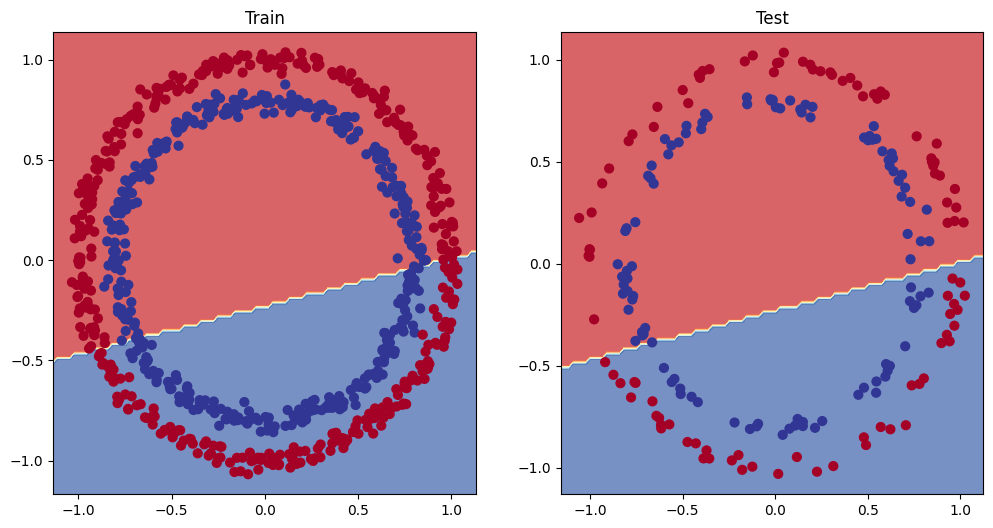

In [94]:
plt.figure( figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [96]:
# So what did we learn from the plots above as to why our model is getting 50% accuracy
# It's because we are using linear layers (resulting in linear line) in the model to fit a data that is non-linear
# Can we ever fit a data that is circular with linear i.e straight lines?

In [97]:
# You can try increasing the number of epocs to see if it helps (it won't)

In [98]:
# 5. Improving our model (from a model perspective)

# Different ways:
# 1. Add more layers (give the model more chances to learn pattern in the data)
# 2. Add more hidden units (number of neurons per hidden layer) ..intuition here is more neurons may "potentially" give model more chances to learn pattterns in data (not always true)
# 3. Fit for longer (increase epochs)
# 4. Changing the activation function + place within model (we are using sigmoid as final activation BUT we can also use activation functions within our models ...hints hints! ;) more on this soon)
# 5. Change the optimization function
# 6. Change the learning rate (the amount optimizer will adjust every epoch )

# These options are all from model's perspective because they all deal directly with the model, rather than data.
# And because these options are all values that we can change, they are called "Hyperparameters"

# There are many other ways to improve model from data perspective that we can disucss later (feature engineering etc.)

In [132]:
# Let's try 3 ideas out of the above
  # Adding more hidden units
  # Increase number of layers
  # Increase number of epochs

# We might want to take multiple of these ideas all at one but in reality we only take one idea at a time, evaluate and test before add more

class CircleModuleV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear( in_features=2, out_features= 10) # 2 input neurons in input layer because data has 2 featuers , run X_train[:5]
    self.layer_2 = nn.Linear( in_features=10, out_features= 10)
    self.layer_3 = nn.Linear( in_features=10, out_features= 1) # 1 output neurons in input layer because data has 2 featuers , run y_train[:5]

  def forward(self, x):

    # One way to do it:
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

    return self.layer_3(self.layer_2(self.layer_1(x))) # this way of writing operations leverages speed ups where possible under the hood in PyTorch

model_1 = CircleModuleV1().to(device)
model_1.state_dict() # compare this to model_0 state dictionary
# model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [133]:
# Now I will do all of the above steps of loss function, optimizer, training and evaluation loop all at once
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD( params = model_0.parameters(),
                            lr = 0.01)
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round( torch.sigmoid(y_logits))
  loss = loss_func(y_logits, y_train)
  acc = accuracy_func(y_true = y_train, y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round( torch.sigmoid(test_logits))
    test_loss = loss_func(test_logits, y_test)
    test_acc = accuracy_func(y_true = y_test, y_pred = test_pred)

  if epoch % 100 == 0:
      print(f"Epoch#: {epoch} | Loss: {loss:.5f}, Accuracy: {acc: .2f}% | Test Loss: {test_loss:.5f} | Test Accuracy: {test_acc: .2f}%")


Epoch#: 0 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 100 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 200 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 300 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 400 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 500 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 600 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 700 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 800 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%
Epoch#: 900 | Loss: 0.69438, Accuracy:  49.88% | Test Loss: 0.69092 | Test Accuracy:  55.00%


In [134]:
# No real improvements even after 1/ Adding more hidden units 2/ Increase number of layers 3/ Increase number of epochs

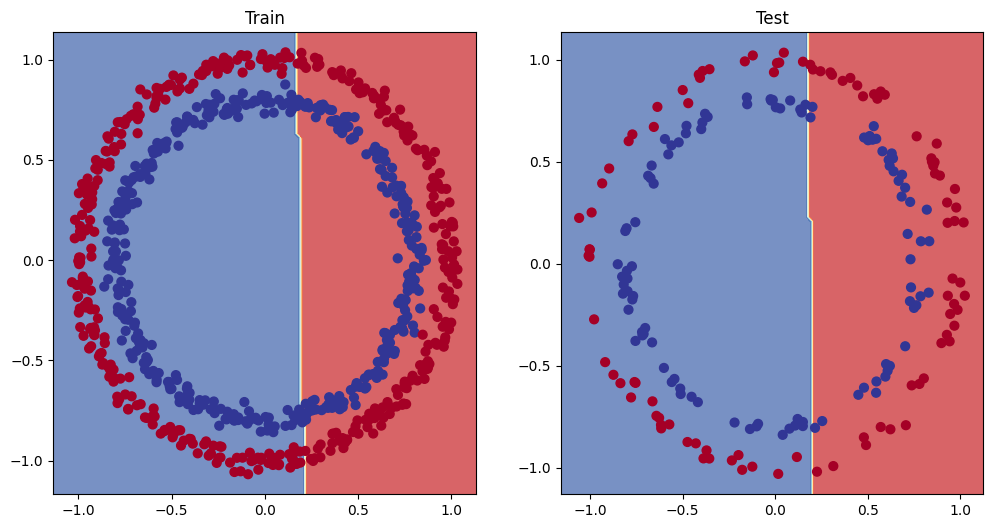

In [136]:
plt.figure( figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)